In [1]:
#importing all the necessary python libraries
import numpy as np
import pandas as pd
from decimal import *
import matplotlib.pyplot as plt

In [2]:
#Readingn the dataset (dataframe)
raw_df = pd.read_csv("https://raw.githubusercontent.com/4m4n5/fifa18-all-player-statistics/master/2019/data.csv",index_col="ID")

In [3]:
#Taking a glance of dataframe
raw_df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#looking at the number of rows and columns in our dataframe
raw_df.shape

(18207, 88)

In [5]:
#Looking if our columns are fully complete or have some missing values.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  

In [6]:
#Begining with data cleaning. First, we remove all the duplicates.
df = raw_df.drop_duplicates()

In [7]:
#Checking the number of rows and columns after removing the duplicates.
df.shape

(18207, 88)

We can see that the number of rows and columns did not change after romoving duplicates meaning there were no duplicate values in our dataset.

In [8]:
#There are 88 columns but ew will not be using all of them. So, droping all the columns which we no longer need.
df.drop(columns=['Unnamed: 0','Photo', 'Flag','Club Logo','Real Face','Position', 
                 'Jersey Number', 'Joined', 'Loaned From','Contract Valid Until',
                 'LS', 'ST', 'RS', 'LW','LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 
                 'LM', 'LCM', 'CM', 'RCM','RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
                 'LCB', 'CB', 'RCB', 'RB','Loaned From','Release Clause'],inplace = True)

In [9]:
#Looking at the remaining columns
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [10]:
#Now the actual shape of dataframe we will be using for our data analysis
df.shape

(18207, 51)

In [11]:
#lets once again have a glimse of our dataframe
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Now lets look/clean up some of the numerical data for analysis

In [12]:
df['Value'].sample(5)

ID
231340    €3.2M
205089    €1.3M
202524    €575K
176377    €2.3M
217646    €1.4M
Name: Value, dtype: object

In [13]:
df["Wage"].sample(5)

ID
190502    €31K
244324     €1K
198491     €1K
222562     €6K
228595    €11K
Name: Wage, dtype: object

As we can see the Value and Wages are not integer format, so we created a function to convert the object type into integer type. 

In [14]:
def numGenerator(text):
    digit = {'K': 3, 'M': 6}
    new_text = text[1:]
    if new_text[-1] in digit:
        num = new_text[:-1]
        magnitude = new_text[-1]
        return Decimal(num) * 10 ** digit[magnitude]
    else:
        return Decimal(new_text)
    
def converter(df):
    cols = ['Value', 'Wage']
    df[cols] = df[cols].applymap(numGenerator)
    return df

converter(df)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000,2202,Left,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,Right,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000,2143,Right,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,1471,Right,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,2281,Right,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000,1000,1307,Right,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000,1000,1098,Right,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
241638,B. Worman,16,England,47,67,Cambridge United,60000,1000,1189,Right,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0


In [15]:
df['Value'].sample(5)

ID
243363       240000
183746       500000
190671    3400000.0
244605      1000000
178089       425000
Name: Value, dtype: object

In [16]:
df['Wage'].sample(5)

ID
230465    22000
198288     4000
237780     4000
225962     1000
208493    16000
Name: Wage, dtype: object

In [17]:
#finding top 5 nations with highest number of players in FIFA
nations= df.Nationality.value_counts().reset_index(name='total')
top_five_nations = nations[0:5]
top_five_nations

,index,total
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


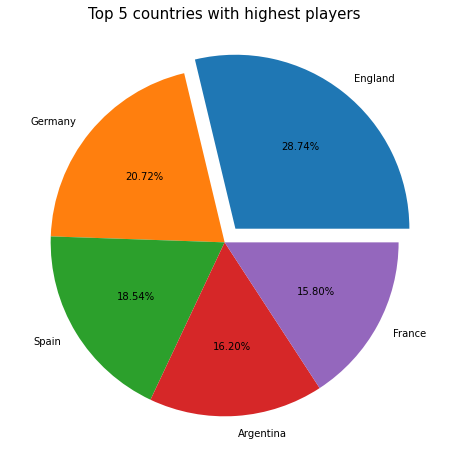

In [18]:
#Top 5 nations with highest numbers of players
plt.pie(top_five_nations['total'],labels=top_five_nations['index'],autopct= "%.2f%%",explode=(.1,0,0,0,0))
plt.title("Top 5 countries with highest players", fontsize=15)
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.show()

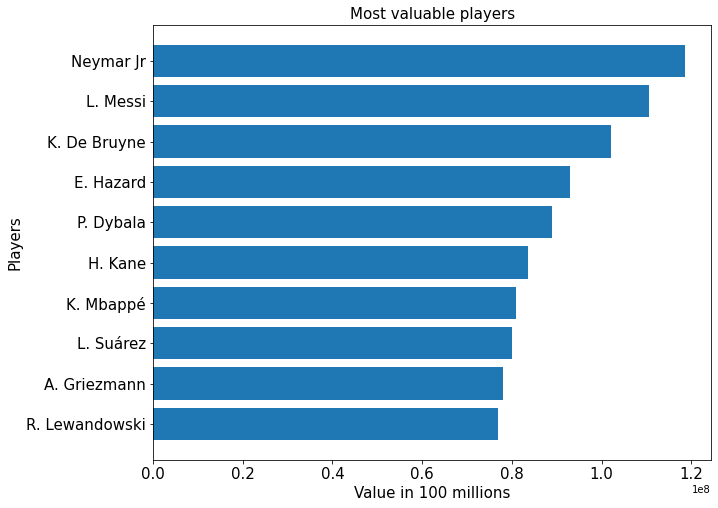

In [19]:
#top 10 players according to the wage
highest_wage =df.sort_values(by = ['Value'], ascending = False)
plt.figure(figsize=(10, 8))
plt.barh(highest_wage['Name'][:10],highest_wage["Value"][:10])
plt.title("Most valuable players",fontsize=15)
plt.ylabel('Players',fontsize=15)
plt.xlabel('Value in 100 millions',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig=plt.gca().invert_yaxis()
plt.show()

In [20]:
#sneak peak of sample height before use
df['Height'].sample(5)

ID
153062    5'6
179698    6'0
202000    6'2
223987    6'2
206022    6'4
Name: Height, dtype: object

In [21]:
#sneak peak of sample weight before use
df['Weight'].sample(5)

ID
186832    165lbs
200449    192lbs
152747    139lbs
208965    150lbs
229783    201lbs
Name: Weight, dtype: object

As we found out that height and weight are not in numerical format, we created a lamda function to convert it into numerical. We also changed the height into cms and weight into kgs.

In [22]:
df["Height"] = df['Height'].fillna("0'0")
df["Height"] = df['Height'].apply(lambda x: int(x.split("'")[0]) * 30.48 + int(x.split("'")[1]) * 2.54)
df['Height'] = df['Height'].replace(0, df["Height"].mean())

In [23]:
df["Weight"] = df['Weight'].fillna("0lbs")
df["Weight"] = df["Weight"].replace({'lbs': ''},regex=True)
df["Weight"] = df["Weight"].astype("int64")
df['Weight'] = df['Weight'].replace(0, df["Weight"].mean())
df['Weight'] = df['Weight']*0.453592

In [24]:
df['Height'].sample(5)

ID
206431    182.88
214767    172.72
229209    177.80
219754    190.50
219690    185.42
Name: Height, dtype: float64

In [25]:
df['Weight'].sample(5)

ID
202322    82.100152
211398    86.182480
211706    69.853168
213542    82.100152
199748    82.100152
Name: Weight, dtype: float64

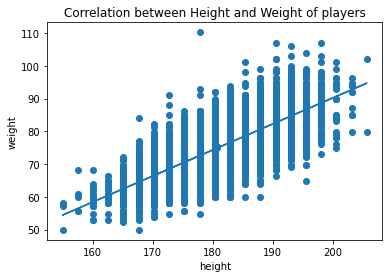

In [26]:
#After converting into float data type, lets see the correlation between height and weight
plt.scatter(df["Height"],df["Weight"]);
plt.xlabel('height')
plt.ylabel('weight')
m,b = np.polyfit(df["Height"],df["Weight"],1)
plt.plot(df["Height"],m*df["Height"]+b  )
plt.title('Correlation between Height and Weight of players')
plt.show()

In [27]:
#calculating correlation
print(df['Height'].corr(df["Weight"]))

0.7546776706360377


In [28]:
temp=df[["Age", "Stamina", "Overall","Acceleration"]]
temp

,Age,Stamina,Overall,Acceleration
ID,,,,
158023,31,72.0,94,91.0
20801,33,88.0,94,89.0
190871,26,81.0,92,94.0
193080,27,43.0,91,57.0
192985,27,90.0,91,78.0
...,...,...,...,...
238813,19,40.0,47,54.0
243165,19,43.0,47,41.0
241638,16,55.0,47,70.0


In [29]:
#grouping the age according to the age and removing players above 40 because they are very few
temp2= temp.groupby('Age').mean().reset_index()
temp2 = temp2[temp2['Age']<40]

[]

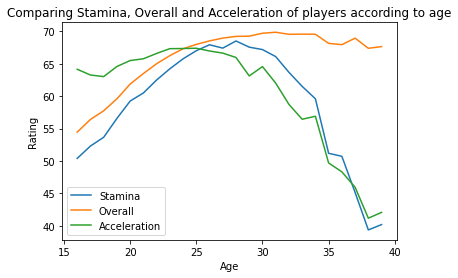

In [30]:
plt.plot(temp2['Age'],temp2['Stamina'],label="Stamina")
plt.plot(temp2['Age'],temp2['Overall'],label="Overall")
plt.plot(temp2['Age'],temp2['Acceleration'],label="Acceleration")
plt.title("Comparing Stamina, Overall and Acceleration of players according to age")
plt.xlabel('Age')
plt.ylabel('Rating')
plt.legend()
plt.plot()

In [31]:
#calculating correlation between longshot and shotpower and visualizing in scatterplot
df['LongShots'].corr(df['ShotPower'])

0.8892543491393222

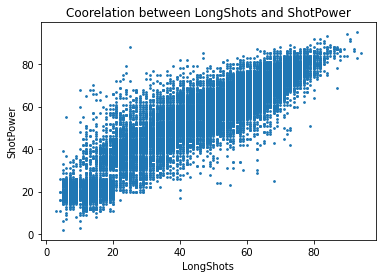

In [32]:
plt.scatter(df['LongShots'],df['ShotPower'],s=3)
plt.xlabel("LongShots")
plt.ylabel('ShotPower')
plt.title("Coorelation between LongShots and ShotPower")
plt.show()

In [33]:
#calculating correlation between penalties and finishing and visualizing in scatterplot
print(df['Penalties'].corr(df['Finishing']));

0.8378270334761936


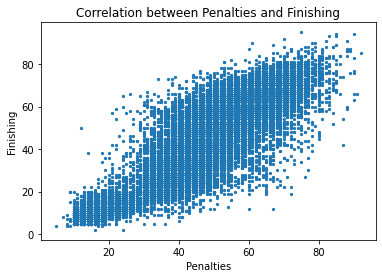

In [34]:
plt.scatter(df['Penalties'],df['Finishing'],s=5)
plt.title('Correlation between Penalties and Finishing')
plt.xlabel('Penalties')
plt.ylabel('Finishing')
plt.show()

In [35]:
#calculating correlation between reactions and overall and visualizing in scatterplot
print(df['Reactions'].corr(df['Overall']));

0.8500449067063615


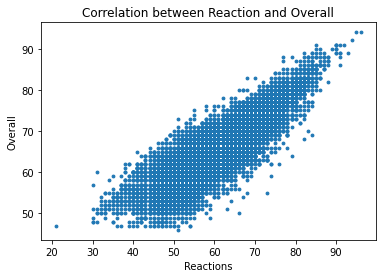

In [36]:
#plotting the correlation
df['Reactions']=df['Reactions'].dropna()
df['Overall']=df['Overall'].dropna()
plt.scatter(df['Reactions'],df['Overall'],s=8)
plt.title('Correlation between Reaction and Overall')
plt.xlabel('Reactions')
plt.ylabel('Overall')
plt.show()

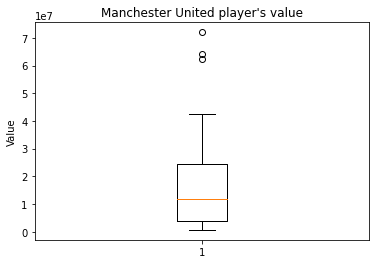

In [37]:
df["Value"]=df["Value"].astype(int)
ratings = df.query('Club== "Manchester United"')['Overall']
value = df.query('Club== "Manchester United"')['Value']

plt.title("Manchester United player's value")
plt.ylabel("Value")
# Creating plot
plt.boxplot(value)
# show plot
plt.show()
 

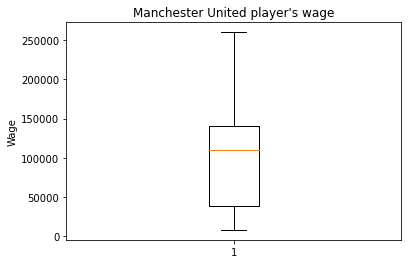

In [38]:
df["Wage"]=df["Wage"].astype(int)
ratings = df.query('Club== "Manchester United"')['Overall']
wage = df.query('Club== "Manchester United"')['Wage']
plt.title("Manchester United player's wage")
plt.ylabel("Wage")
# Creating plot
plt.boxplot(wage)
# show plot
plt.show()
